<a href="https://colab.research.google.com/github/pratb0301/pratbais1001/blob/main/Flight_Dealy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

In [8]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Airline_Delay_Cause.csv to Airline_Delay_Cause.csv


In [14]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Airline_Delay_Cause.csv']))

In [15]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [17]:
df.shape

(179338, 21)

In [18]:
df.describe(include='all')

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,179338.000000,179338.000000,179338,179338,179338,179338,178997.000000,178747.000000,178997.000000,178997.000000,...,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
unique,NaN,NaN,29,39,396,420,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,OO,SkyWest Airlines Inc.,CLE,"Cleveland, OH: Cleveland-Hopkins International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,23821,23821,1593,1593,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019.480082,6.485725,NaN,NaN,NaN,NaN,327.816969,58.709086,18.572643,2.035742,...,0.145307,20.778477,6.830103,0.779572,3863.310676,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,2.410204,3.463516,NaN,NaN,NaN,NaN,931.001446,164.378035,47.389651,6.894812,...,0.702149,64.912766,41.446756,3.490499,11902.153241,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,2015.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,NaN,NaN,NaN,NaN,41.000000,6.000000,1.960000,0.000000,...,0.000000,1.000000,0.000000,0.000000,288.000000,91.000000,0.000000,28.000000,0.000000,54.000000
50%,2020.000000,6.000000,NaN,NaN,NaN,NaN,89.000000,15.000000,5.400000,0.220000,...,0.000000,4.290000,1.000000,0.000000,900.000000,321.000000,12.000000,124.000000,0.000000,286.000000
75%,2022.000000,9.000000,NaN,NaN,NaN,NaN,218.000000,40.000000,14.700000,1.620000,...,0.000000,13.010000,3.000000,1.000000,2547.000000,986.000000,131.000000,401.000000,0.000000,964.000000


In [19]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,341
arr_del15,591
carrier_ct,341
weather_ct,341


In [20]:
# Check missing data
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print(missing)

arr_del15              591
weather_ct             341
carrier_ct             341
arr_flights            341
security_ct            341
weather_delay          341
arr_diverted           341
arr_delay              341
carrier_delay          341
security_delay         341
nas_ct                 341
late_aircraft_ct       341
arr_cancelled          341
late_aircraft_delay    341
nas_delay              341
dtype: int64


In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [25]:
df.shape

(178747, 21)

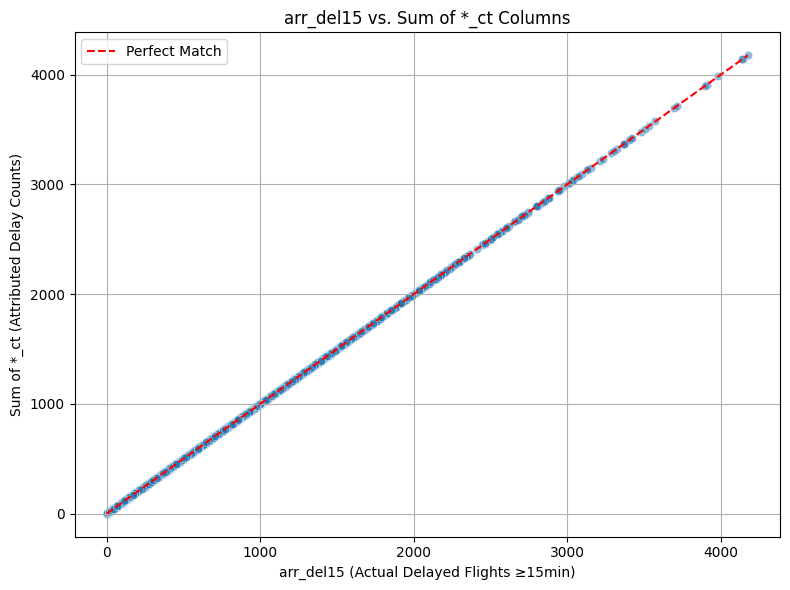

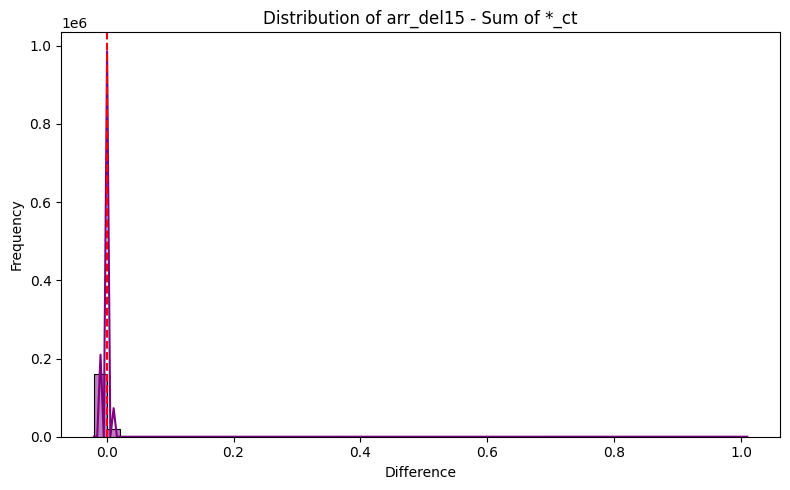

In [26]:
# Assuming your dataframe is named df
ct_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Create a new column for the total of all cause counts
df['total_ct'] = df[ct_cols].sum(axis=1)

# 1. Scatter Plot: arr_del15 vs. sum of *_ct
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='arr_del15', y='total_ct', alpha=0.5)
plt.plot([0, df['arr_del15'].max()], [0, df['arr_del15'].max()], color='red', linestyle='--', label='Perfect Match')
plt.title("arr_del15 vs. Sum of *_ct Columns")
plt.xlabel("arr_del15 (Actual Delayed Flights ≥15min)")
plt.ylabel("Sum of *_ct (Attributed Delay Counts)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Distribution of Difference (Error)
df['diff'] = df['arr_del15'] - df['total_ct']

plt.figure(figsize=(8,5))
sns.histplot(df['diff'], kde=True, bins=50, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of arr_del15 - Sum of *_ct")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [27]:
df[df['arr_del15'] != df['total_ct']].shape

(44544, 23)

In [28]:
(df['arr_del15'] != df['total_ct']).sum()  # Total mismatches
(df['diff'] > 0).sum()                     # Positive mismatches
(df['diff'] < 0).sum()                     # Negative mismatches
(df['diff'] == 0).sum()

np.int64(134203)

In [29]:
len(df)

178747

In [34]:
df[df['arr_del15'] != df['total_ct']].head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,total_ct,diff,carrier_delay_pct,late_aircraft_delay_pct,weather_delay_pct,nas_delay_pct,security_delay_pct,controllable_delay,uncontrollable_delay,delayed_ratio
6,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,...,13.01,-1.000000e-02,0.601099,0.084615,0.000000,0.314286,0.0,624.0,286.0,0.270833
12,2023,12,9E,Endeavor Air Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",122.0,12.0,6.41,0.00,...,12.01,-1.000000e-02,0.644706,0.238824,0.000000,0.116471,0.0,751.0,99.0,0.098361
23,2023,12,9E,Endeavor Air Inc.,CHS,"Charleston, SC: Charleston AFB/International",146.0,24.0,6.30,0.00,...,23.99,1.000000e-02,0.375093,0.418345,0.000000,0.206562,0.0,1064.0,277.0,0.164384
30,2023,12,9E,Endeavor Air Inc.,CWA,"Mosinee, WI: Central Wisconsin",62.0,7.0,2.86,1.63,...,7.00,-8.881784e-16,0.072304,0.008578,0.828431,0.090686,0.0,66.0,750.0,0.112903
31,2023,12,9E,Endeavor Air Inc.,DAY,"Dayton, OH: James M Cox/Dayton International",56.0,3.0,1.96,0.00,...,2.99,1.000000e-02,0.860494,0.082716,0.000000,0.056790,0.0,764.0,46.0,0.053571


In [33]:
# Create delay ratio (for classification-style insights)
df['delayed_ratio'] = df['arr_del15'] / df['arr_flights']

In [32]:
# Create controllable & uncontrollable delay aggregations
df['controllable_delay'] = df['carrier_delay'] + df['late_aircraft_delay']
df['uncontrollable_delay'] = df['weather_delay'] + df['nas_delay'] + df['security_delay']

In [31]:
# Create delay type contribution ratios
df['carrier_delay_pct'] = df['carrier_delay'] / df['arr_delay']
df['late_aircraft_delay_pct'] = df['late_aircraft_delay'] / df['arr_delay']
df['weather_delay_pct'] = df['weather_delay'] / df['arr_delay']
df['nas_delay_pct'] = df['nas_delay'] / df['arr_delay']
df['security_delay_pct'] = df['security_delay'] / df['arr_delay']

In [35]:
df.isnull().sum().sort_values(ascending=False)

,0
late_aircraft_delay_pct,8373
weather_delay_pct,8373
carrier_delay_pct,8373
security_delay_pct,8373
nas_delay_pct,8373
month,0
year,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [36]:
df['carrier_delay_pct'] = np.where(
    df['arr_delay'] == 0, 0, df['carrier_delay'] / df['arr_delay']
)
df['weather_delay_pct'] = np.where(
    df['arr_delay'] == 0, 0, df['weather_delay'] / df['arr_delay']
)
df['nas_delay_pct'] = np.where(
    df['arr_delay'] == 0, 0, df['nas_delay'] / df['arr_delay']
)
df['security_delay_pct'] = np.where(
    df['arr_delay'] == 0, 0, df['security_delay'] / df['arr_delay']
)
df['late_aircraft_delay_pct'] = np.where(
    df['arr_delay'] == 0, 0, df['late_aircraft_delay'] / df['arr_delay']
)

In [37]:
df[['carrier_delay_pct', 'weather_delay_pct', 'nas_delay_pct',
    'security_delay_pct', 'late_aircraft_delay_pct']].isnull().sum()

,0
carrier_delay_pct,0
weather_delay_pct,0
nas_delay_pct,0
security_delay_pct,0
late_aircraft_delay_pct,0


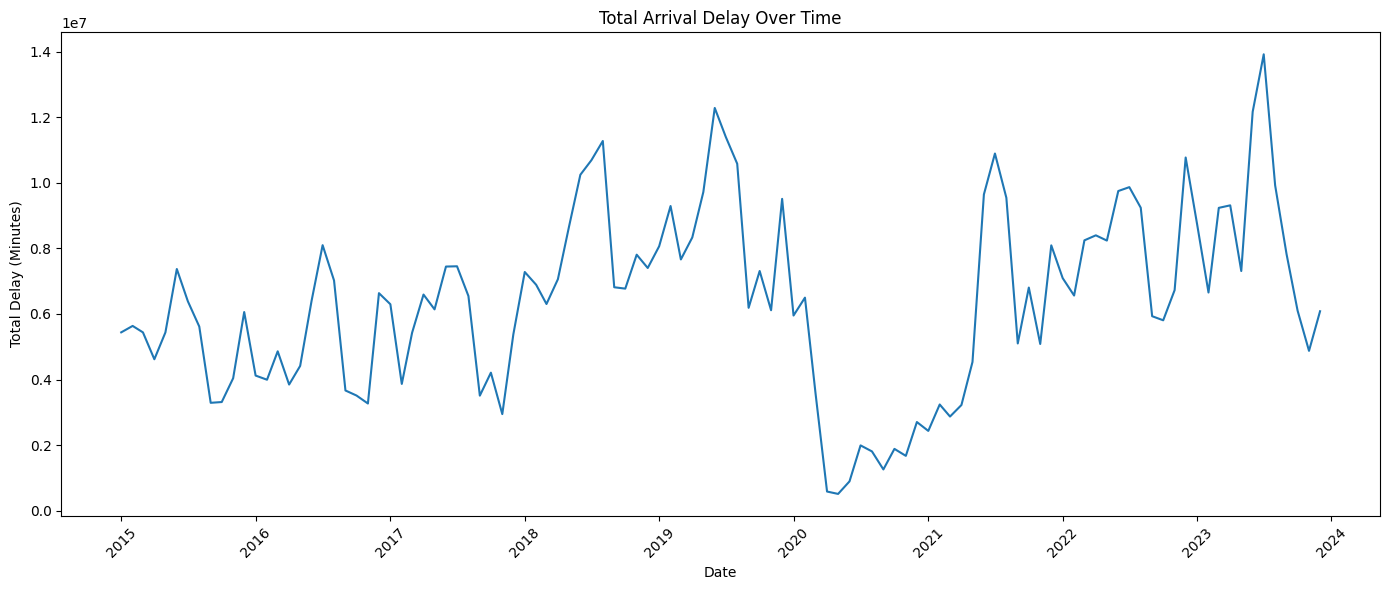

In [38]:
monthly_delay = df.groupby(['year', 'month'])['arr_delay'].sum().reset_index()
monthly_delay['date'] = pd.to_datetime(monthly_delay[['year', 'month']].assign(day=1))

plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='arr_delay', data=monthly_delay)
plt.title("Total Arrival Delay Over Time")
plt.ylabel("Total Delay (Minutes)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

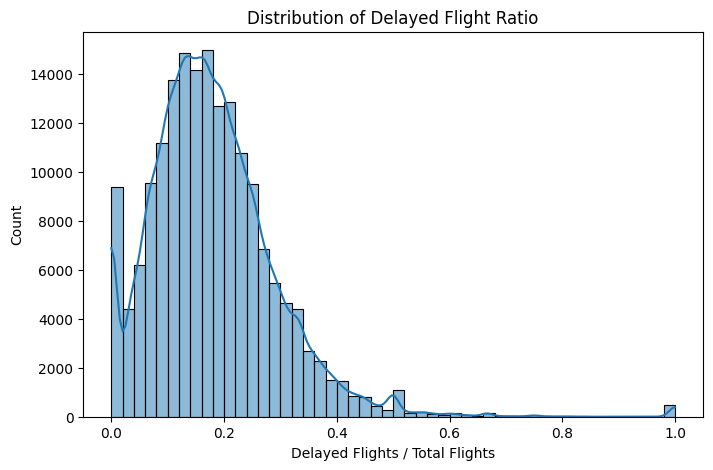

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['delayed_ratio'], bins=50, kde=True)
plt.title("Distribution of Delayed Flight Ratio")
plt.xlabel("Delayed Flights / Total Flights")
plt.show()


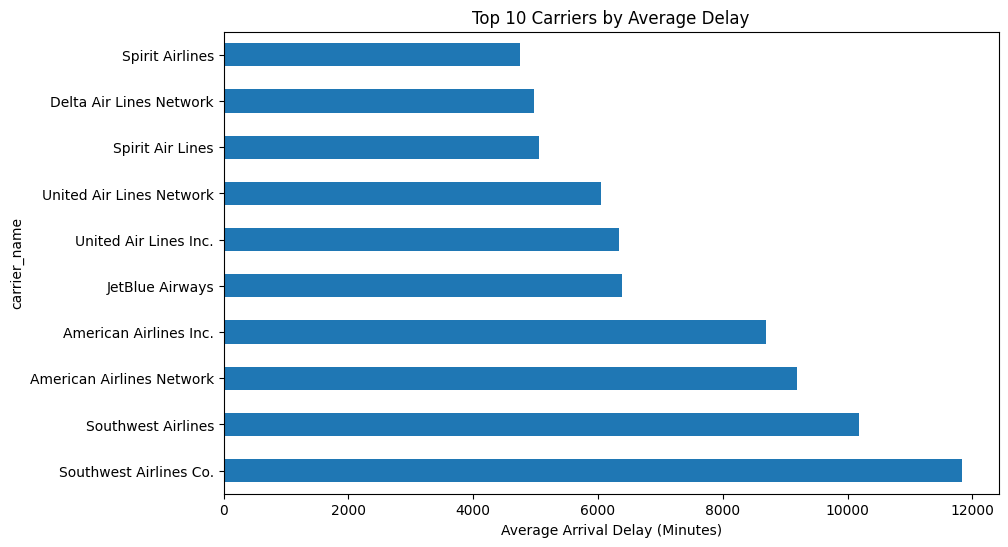

In [39]:
carrier_avg_delay = df.groupby('carrier_name')['arr_delay'].mean().sort_values(ascending=False).head(10)
carrier_avg_delay.plot(kind='barh', figsize=(10,6), title='Top 10 Carriers by Average Delay')
plt.xlabel("Average Arrival Delay (Minutes)")
plt.show()


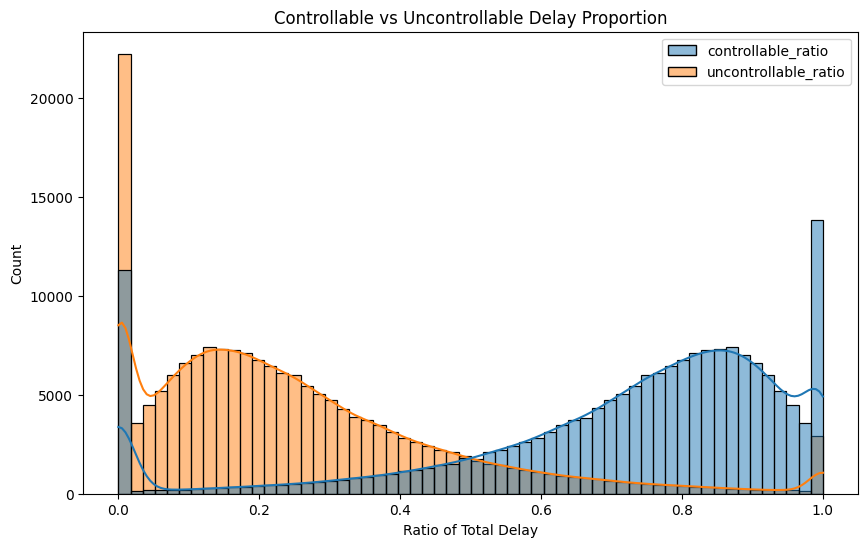

In [40]:
df['controllable_ratio'] = df['controllable_delay'] / (df['arr_delay'] + 1e-5)
df['uncontrollable_ratio'] = df['uncontrollable_delay'] / (df['arr_delay'] + 1e-5)

plt.figure(figsize=(10,6))
sns.histplot(df[['controllable_ratio', 'uncontrollable_ratio']], kde=True)
plt.title("Controllable vs Uncontrollable Delay Proportion")
plt.xlabel("Ratio of Total Delay")
plt.show()


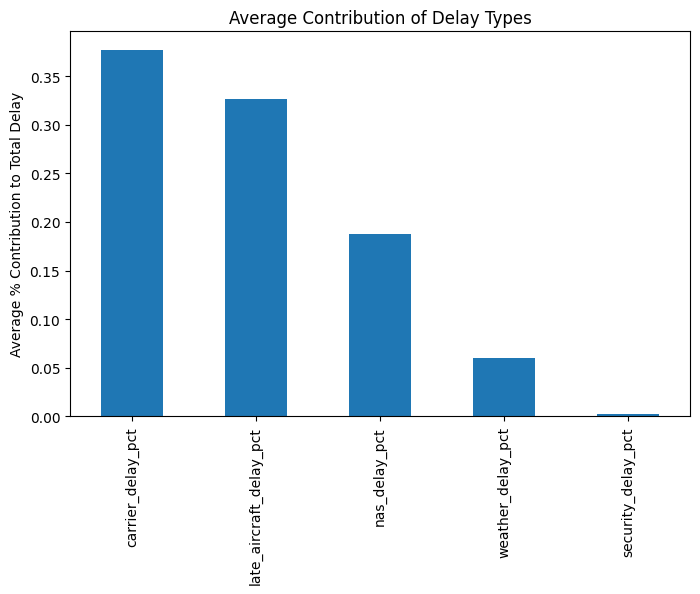

In [41]:
mean_pct = df[[
    'carrier_delay_pct', 'late_aircraft_delay_pct', 'weather_delay_pct',
    'nas_delay_pct', 'security_delay_pct'
]].mean().sort_values(ascending=False)

mean_pct.plot(kind='bar', figsize=(8,5), title="Average Contribution of Delay Types")
plt.ylabel("Average % Contribution to Total Delay")
plt.show()

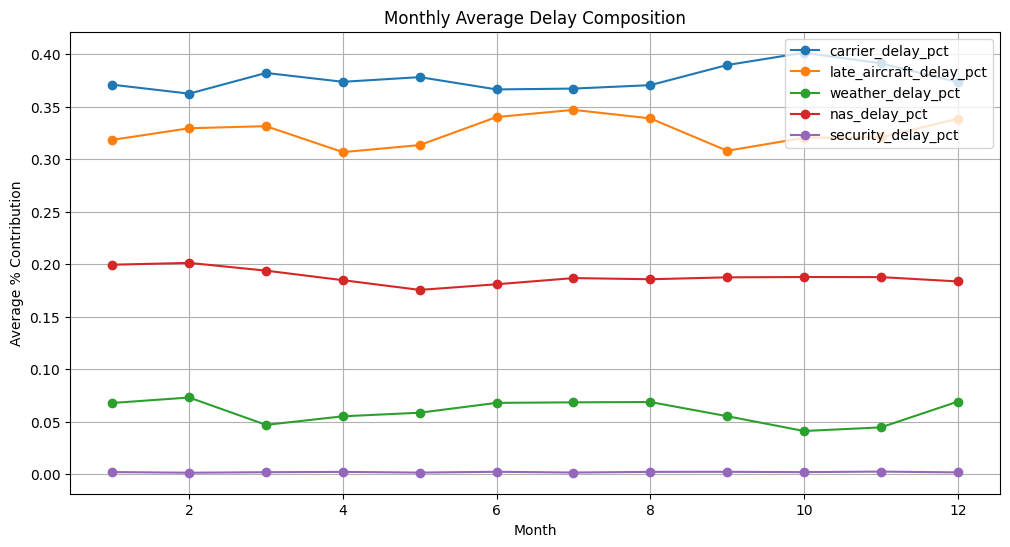

In [42]:
monthly_avg = df.groupby('month')[[
    'carrier_delay_pct', 'late_aircraft_delay_pct', 'weather_delay_pct',
    'nas_delay_pct', 'security_delay_pct'
]].mean()

monthly_avg.plot(figsize=(12,6), marker='o')
plt.title("Monthly Average Delay Composition")
plt.xlabel("Month")
plt.ylabel("Average % Contribution")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [43]:
df['on_time'] = df['arr_flights'] - df['arr_del15']
df['late'] = df['arr_del15']
df['cancelled'] = df['arr_cancelled']
df['diverted'] = df['arr_diverted']
df['early'] = df['arr_flights'] - df['arr_del15']

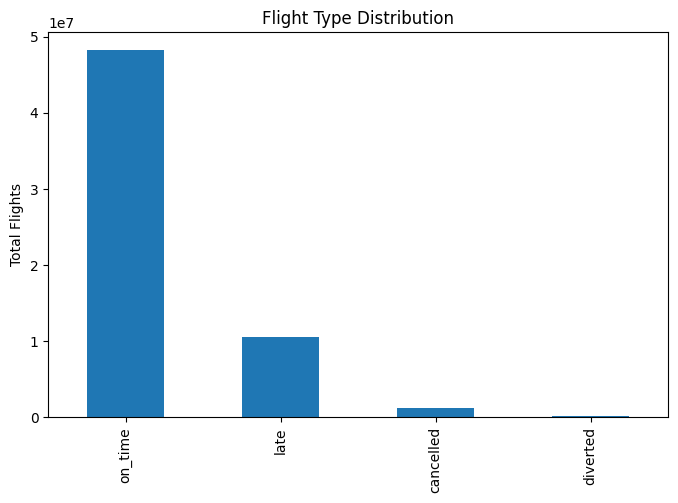

In [44]:
totals = df[['on_time', 'late', 'cancelled', 'diverted']].sum()
totals.plot(kind='bar', figsize=(8,5), title='Flight Type Distribution')
plt.ylabel("Total Flights")
plt.show()

In [45]:
delay_cols = [
    'delayed_ratio',
    'arr_delay',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay',
    'arr_cancelled',
    'arr_diverted',
    'arr_flights',
    'arr_del15',
    'carrier_ct',
    'weather_ct',
    'nas_ct',
    'security_ct',
    'late_aircraft_ct'
]

In [47]:
corr_matrix = df[delay_cols].corr()

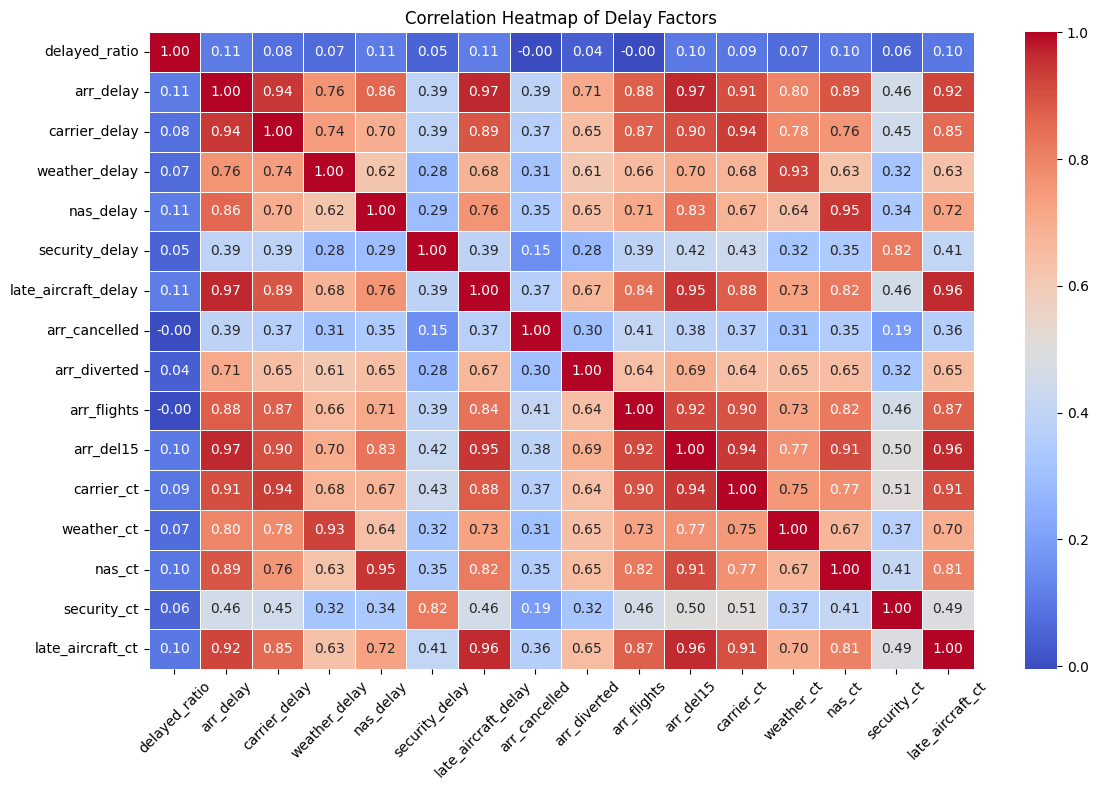

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Delay Factors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
pip install shap

In [50]:
import shap

In [51]:
df['delayed_or_not'] = (df['arr_del15'] / df['arr_flights'] > 0.15).astype(int)

In [52]:
df['carrier_enc'] = LabelEncoder().fit_transform(df['carrier'])
df['airport_enc'] = LabelEncoder().fit_transform(df['airport'])

# Final safe features
feature_cols = [
    'year',
    'month',
    'carrier_enc',
    'airport_enc',
    'arr_flights',
    'arr_cancelled',
    'arr_diverted'
]

In [53]:
X = df[feature_cols]
y = df['delayed_or_not']

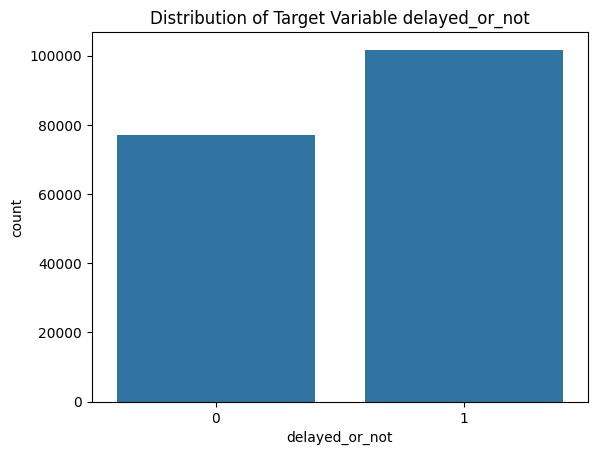

delayed_or_not
1    0.56919
0    0.43081
Name: proportion, dtype: float64


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("Distribution of Target Variable delayed_or_not")
plt.show()

print(y.value_counts(normalize=True))


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'module'>

In [64]:
shap.summary_plot(shap_values, X_test, feature_names=feature_cols)

NameError: name 'shap_values' is not defined

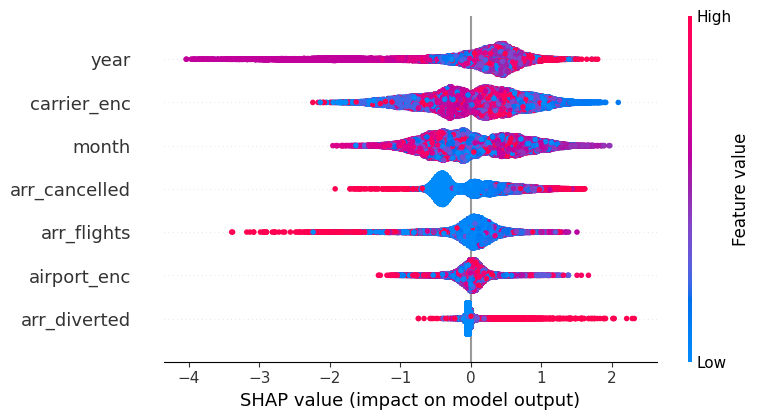

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=feature_cols)

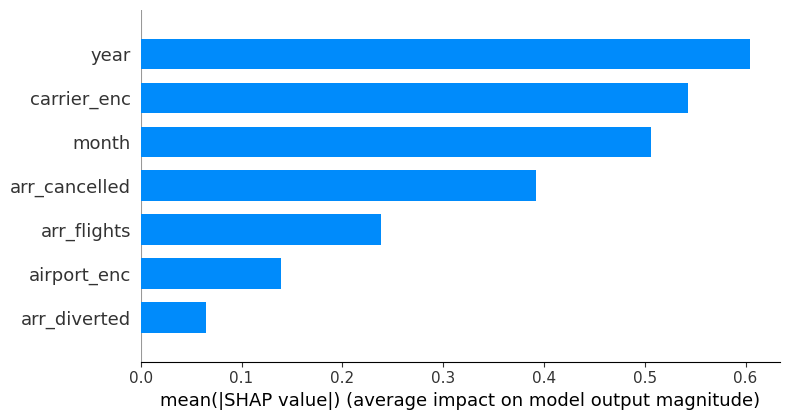

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=feature_cols, plot_type="bar")

In [65]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:58:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [66]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)  # Optional: store separately
    }

    return metrics

In [67]:
results = []

results.append(evaluate_model("Logistic Regression", lr, X_test, y_test))
results.append(evaluate_model("Random Forest", rf, X_test, y_test))
results.append(evaluate_model("XGBoost", xgb, X_test, y_test))

# Convert to DataFrame for plotting (drop Confusion Matrix for now)
import pandas as pd
metrics_df = pd.DataFrame(results).drop(columns=['Confusion Matrix'])

In [68]:
print(results)

[{'Model': 'Logistic Regression', 'Accuracy': 0.5709090909090909, 'Precision': 0.5705552581908331, 'Recall': 0.9952823234556981, 'F1 Score': 0.7253160477026107, 'ROC AUC': np.float64(0.5555362731771405), 'Confusion Matrix': array([[  157, 15244],
       [   96, 20253]])}, {'Model': 'Random Forest', 'Accuracy': 0.7487832167832168, 'Precision': 0.7642491864249187, 'Recall': 0.8078529657477026, 'F1 Score': 0.7854463795121718, 'ROC AUC': np.float64(0.8271201764008008), 'Confusion Matrix': array([[10330,  5071],
       [ 3910, 16439]])}, {'Model': 'XGBoost', 'Accuracy': 0.7624615384615384, 'Precision': 0.7717376357886052, 'Recall': 0.8274116664209543, 'F1 Score': 0.7986055115495897, 'ROC AUC': np.float64(0.8459012895577969), 'Confusion Matrix': array([[10421,  4980],
       [ 3512, 16837]])}]


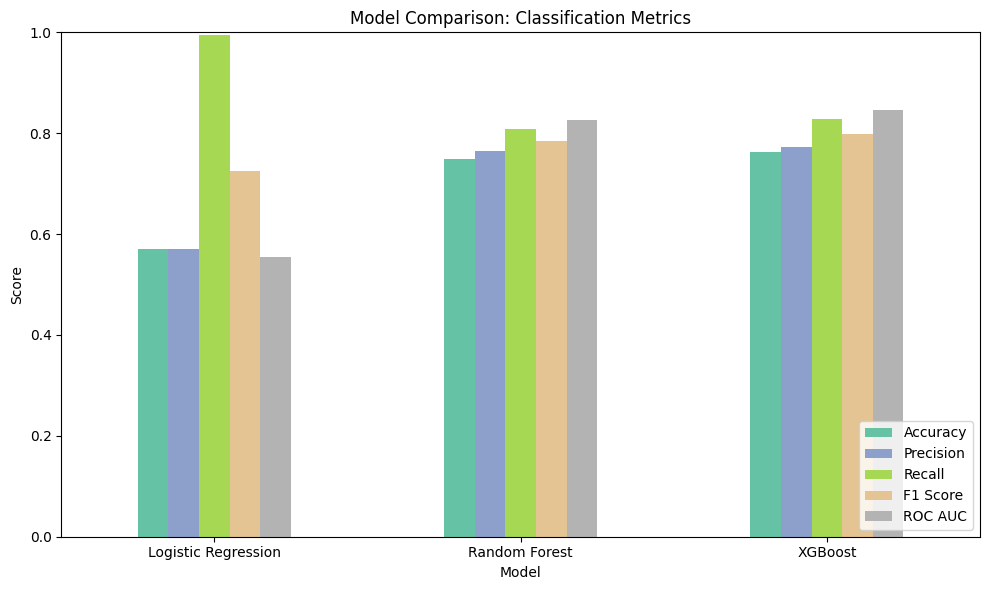

In [69]:
metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']].plot(
    kind='bar', figsize=(10,6), colormap='Set2', rot=0)
plt.title("Model Comparison: Classification Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [70]:
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Delayed', 'Delayed'],
                yticklabels=['Not Delayed', 'Delayed'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.tight_layout()
    plt.show()

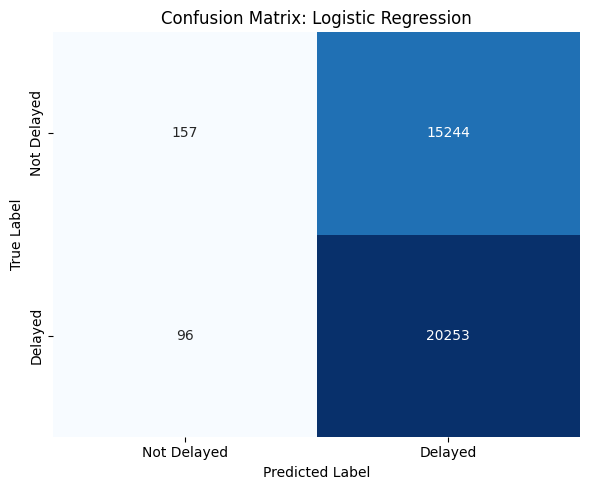

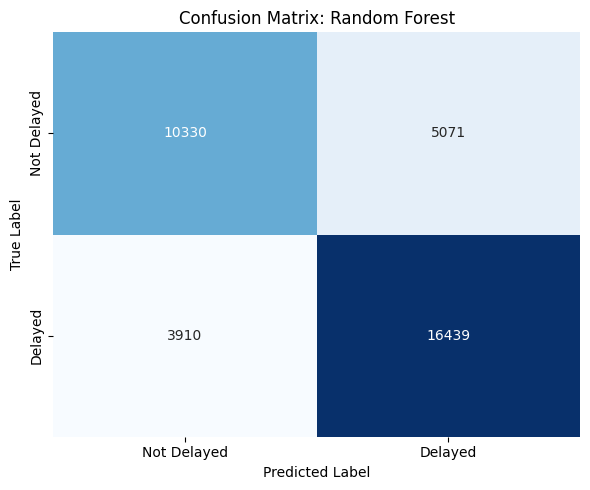

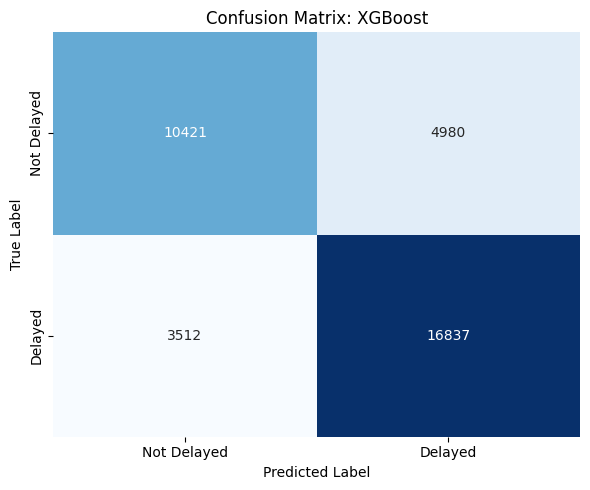

In [71]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Plot for each
plot_confusion_matrix("Logistic Regression", y_test, y_pred_lr)
plot_confusion_matrix("Random Forest", y_test, y_pred_rf)
plot_confusion_matrix("XGBoost", y_test, y_pred_xgb)

In [72]:
regression_features = [
    'year', 'month', 'carrier_enc', 'airport_enc',
    'arr_flights', 'arr_cancelled', 'arr_diverted',
    'arr_del15',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
    'controllable_delay', 'uncontrollable_delay'
]

In [73]:
X = df[regression_features]

In [74]:
df['avg_delay_per_flight'] = df['arr_delay'] / df['arr_flights']
y = df['avg_delay_per_flight']

In [75]:
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

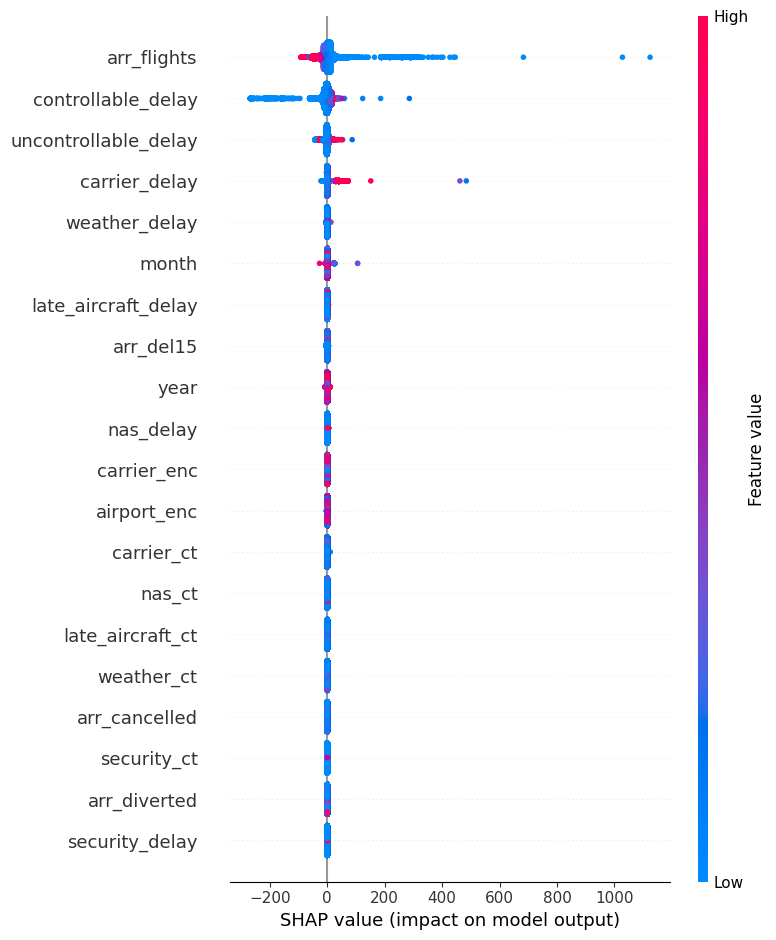

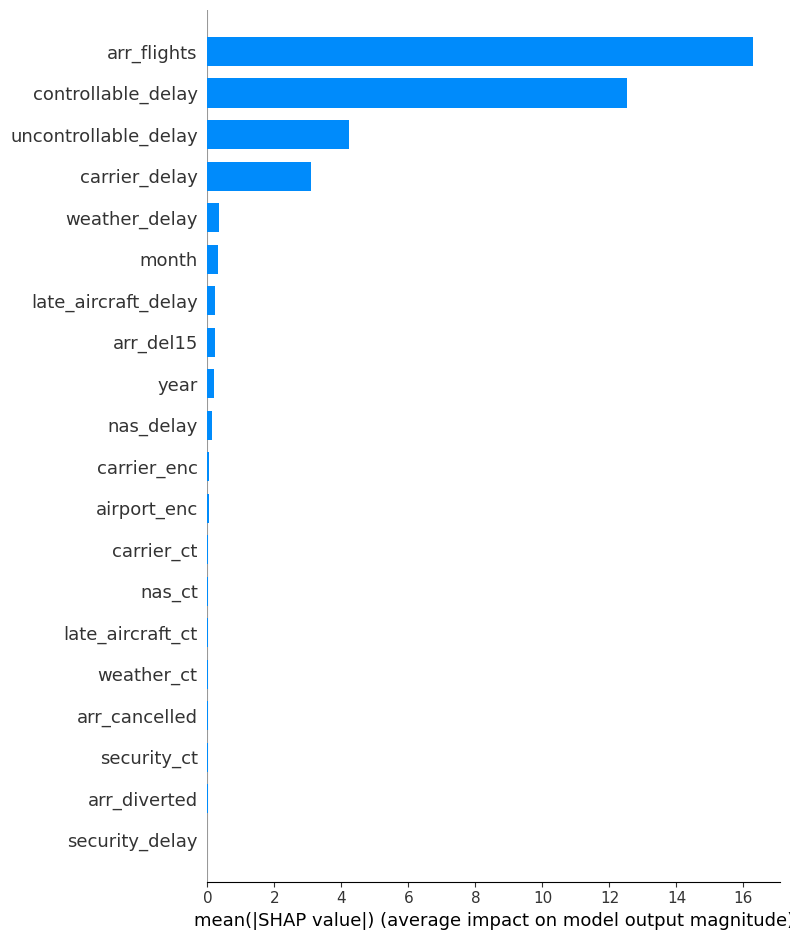

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=regression_features)

# Bar Plot
shap.summary_plot(shap_values, X_test, feature_names=regression_features, plot_type="bar")

In [77]:
alpha = 0.7  # weight for carrier_delay
beta = 0.3   # weight for late_aircraft_delay

In [78]:
df['OAI'] = alpha * df['carrier_delay'] + beta * df['late_aircraft_delay']

In [79]:
df['controllable_pct'] = df['OAI'] / df['arr_delay']

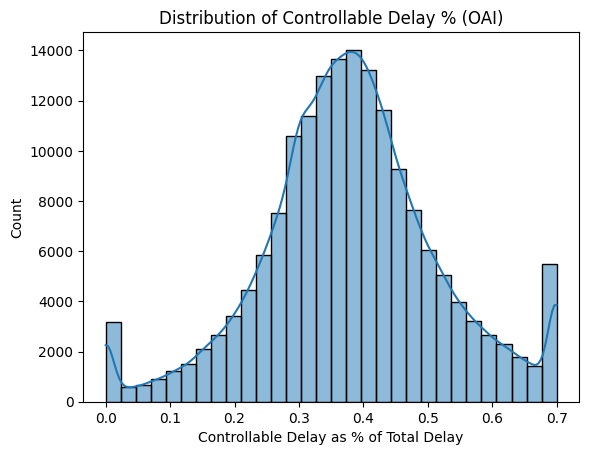

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['controllable_pct'].clip(0, 1), bins=30, kde=True)
plt.title("Distribution of Controllable Delay % (OAI)")
plt.xlabel("Controllable Delay as % of Total Delay")
plt.show()


In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
def evaluate_regression_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    metrics = {
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

    return metrics

In [ ]:
results = []

results.append(evaluate_regression_model("Linear Regression", lr, X_test, y_test))
results.append(evaluate_regression_model("Random Forest", rf, X_test, y_test))
results.append(evaluate_regression_model("XGBoost", xgb, X_test, y_test))

# Convert to DataFrame for plotting
import pandas as pd
metrics_df = pd.DataFrame(results)

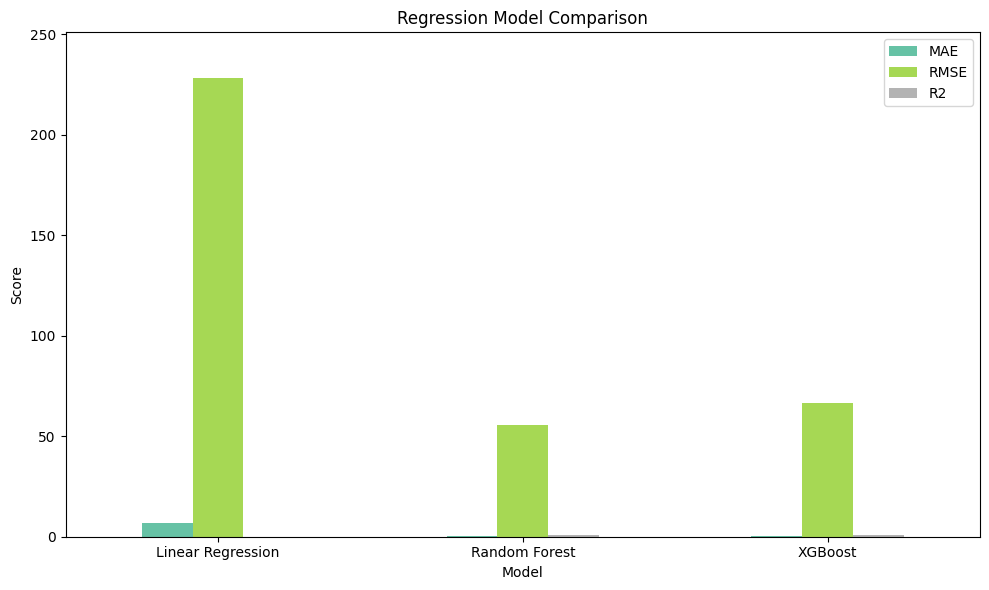

In [ ]:
metrics_df.set_index('Model')[['MAE', 'RMSE', 'R2']].plot(
    kind='bar', figsize=(10,6), colormap='Set2', rot=0)
plt.title("Regression Model Comparison")
plt.ylabel("Score")
plt.ylim(0, max(metrics_df[['MAE', 'RMSE']].max()) * 1.1)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
print(results)

[{'Model': 'Linear Regression', 'MAE': 6.721854541015735, 'RMSE': 228.1701415672149, 'R2': 0.03585317127516596}, {'Model': 'Random Forest', 'MAE': 0.29434572465386927, 'RMSE': 55.56043680429817, 'R2': 0.7652259906599115}, {'Model': 'XGBoost', 'MAE': 0.5836557780151003, 'RMSE': 66.50959916827408, 'R2': 0.7189596382883374}]
